In [2]:
import cv2
import os
import PIL
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:
data_dir='/kaggle/input/segmented-medicinal-leaf-images/Segmented Medicinal Leaf Images'
num_classes = len(os.listdir(data_dir))

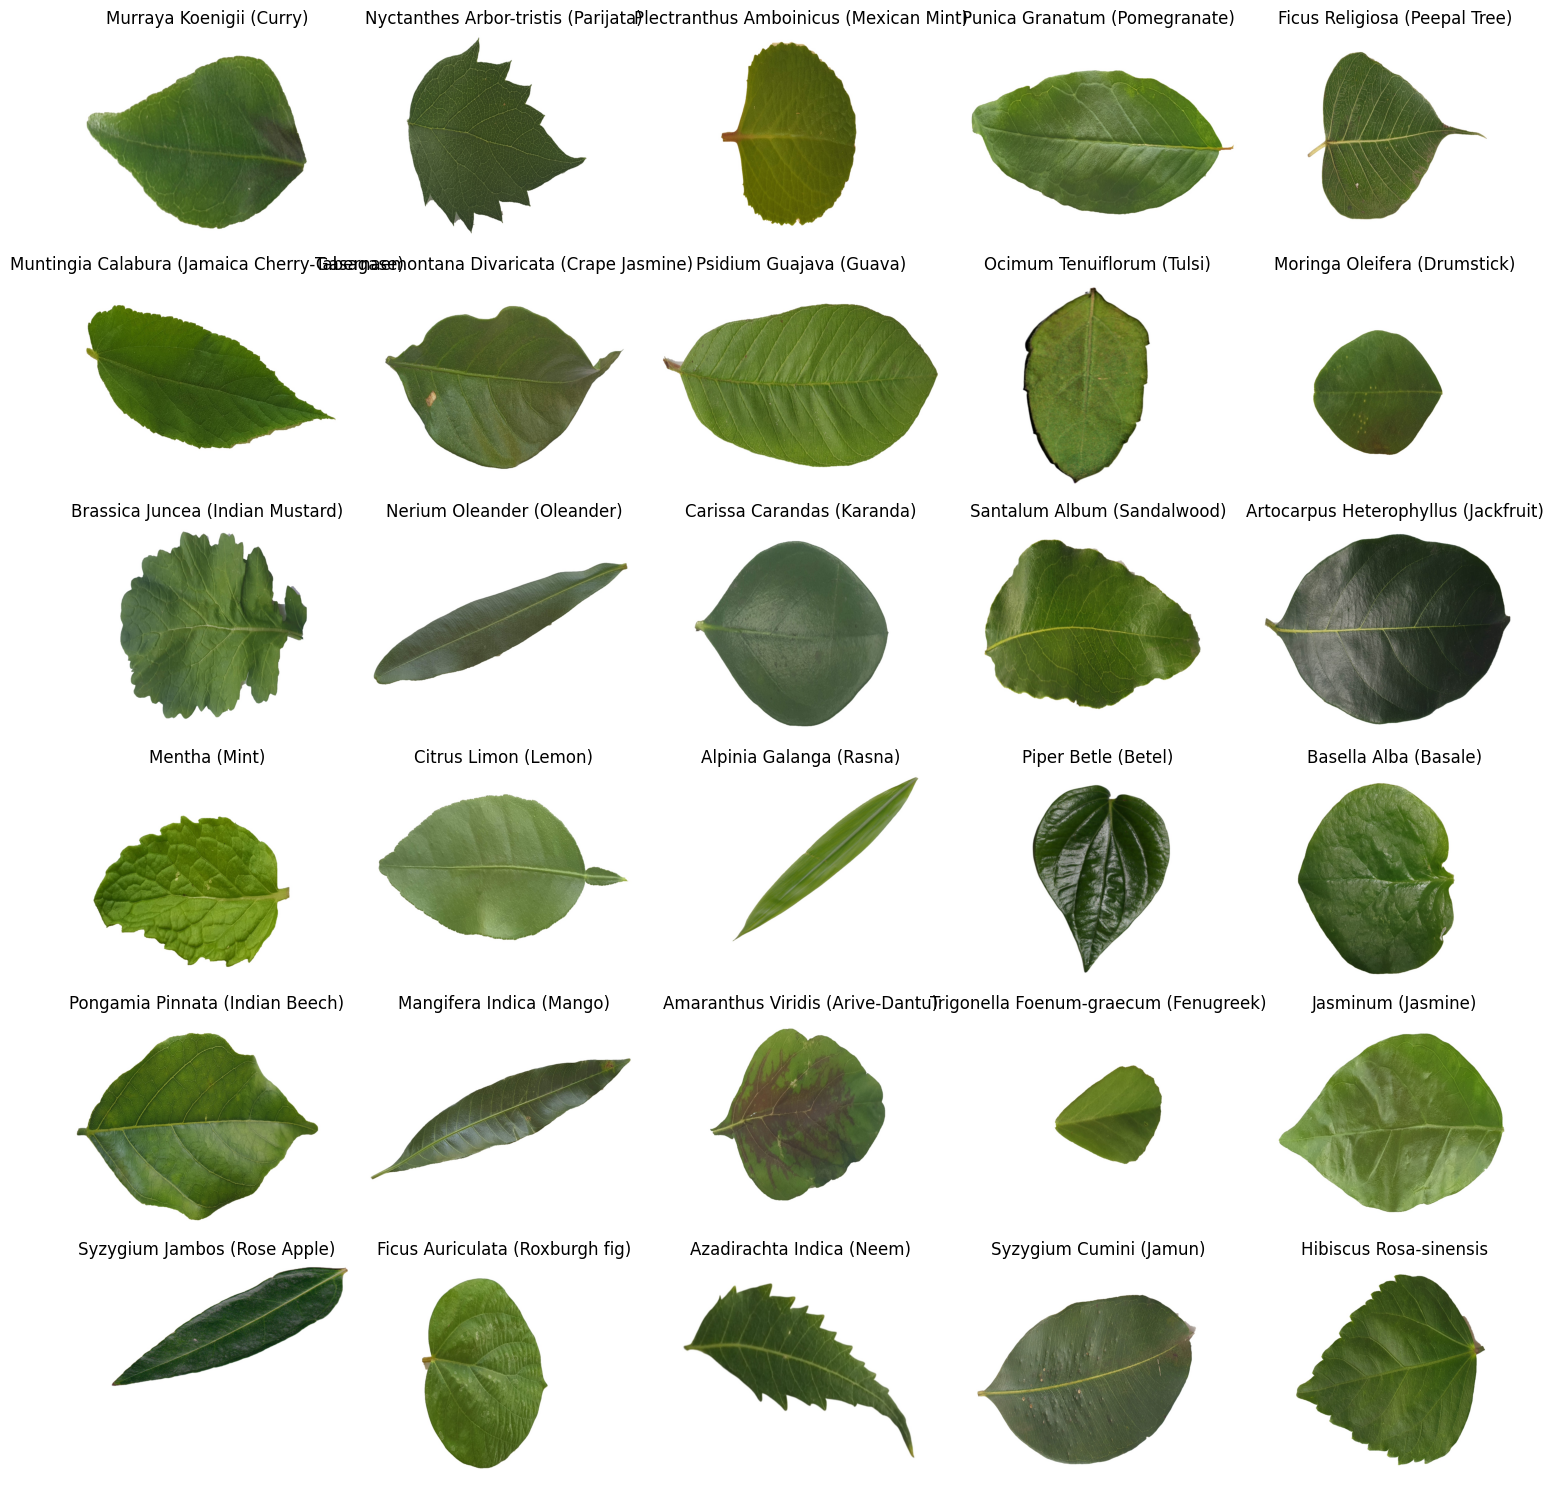

In [5]:
# List all subdirectories (class folders) in the main directory
class_folders = os.listdir(data_dir)

# Set the number of images per row
images_per_row = 5

# Calculate the number of rows needed
num_rows = math.ceil(len(class_folders) / images_per_row)

# Create a grid of subplots
fig, axs = plt.subplots(num_rows, images_per_row, figsize=(15, 15))

# Display images in rows with titles
for i, class_folder in enumerate(class_folders):
    # Get the first image file in the class folder
    class_folder_path = os.path.join(data_dir, class_folder)
    image_files = [f for f in os.listdir(class_folder_path) if f.endswith('.jpg')]
    if image_files:
        first_image_path = os.path.join(class_folder_path, image_files[0])
        
        # Load the image
        img = mpimg.imread(first_image_path)
        
        # Calculate the row and column indices for the subplot
        row = i // images_per_row
        col = i % images_per_row
        
        # Display the image in the corresponding subplot
        axs[row, col].imshow(img)
        axs[row, col].set_title(class_folder)
        axs[row, col].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [6]:
import pathlib

data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))  #.glob() returns all file paths matching string
print(image_count)

1835


In [7]:
basale=list(data_dir.glob('Basella Alba (Basale)/*'))
print(basale[:5])

[PosixPath('/kaggle/input/segmented-medicinal-leaf-images/Segmented Medicinal Leaf Images/Basella Alba (Basale)/BA-S-083.jpg'), PosixPath('/kaggle/input/segmented-medicinal-leaf-images/Segmented Medicinal Leaf Images/Basella Alba (Basale)/BA-S-064.jpg'), PosixPath('/kaggle/input/segmented-medicinal-leaf-images/Segmented Medicinal Leaf Images/Basella Alba (Basale)/BA-S-010.jpg'), PosixPath('/kaggle/input/segmented-medicinal-leaf-images/Segmented Medicinal Leaf Images/Basella Alba (Basale)/BA-S-071.jpg'), PosixPath('/kaggle/input/segmented-medicinal-leaf-images/Segmented Medicinal Leaf Images/Basella Alba (Basale)/BA-S-041.jpg')]


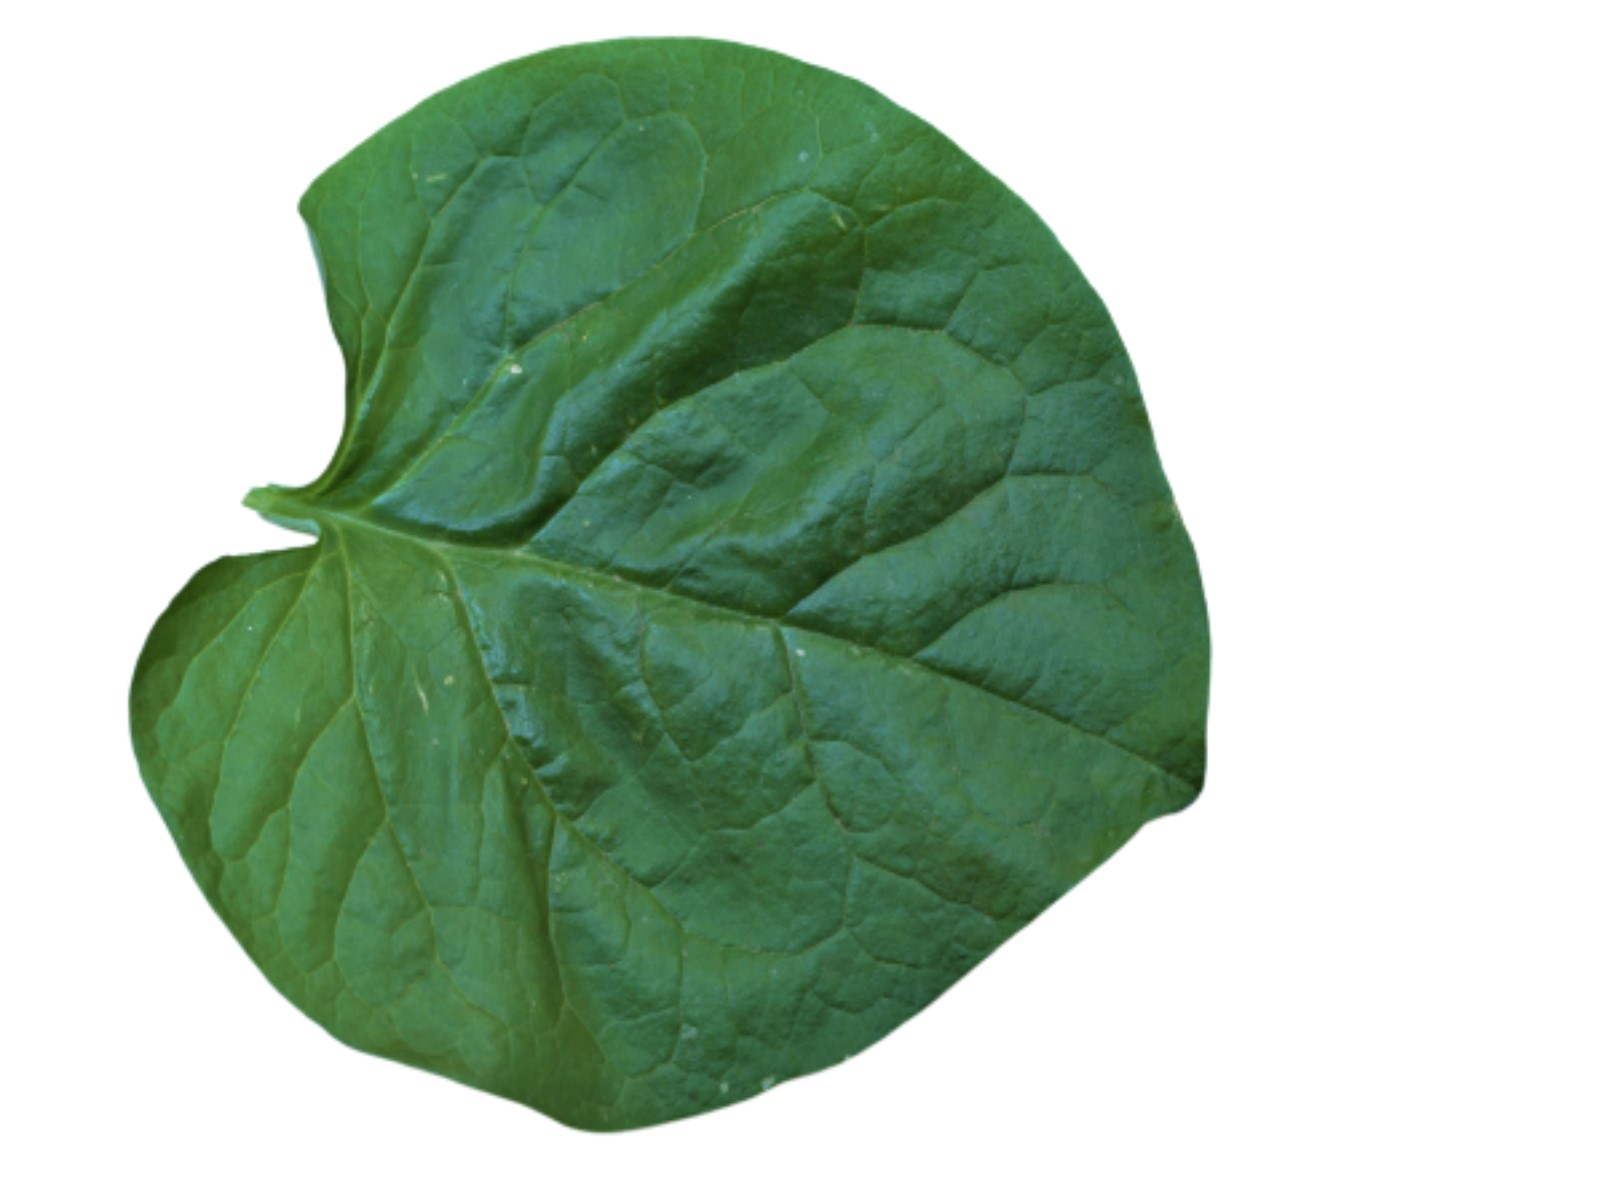

In [8]:
PIL.Image.open(str(basale[5]))

In [9]:
image5=cv2.imread(str(basale[5]))
print(image5)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


(-0.5, 1599.5, 1199.5, -0.5)

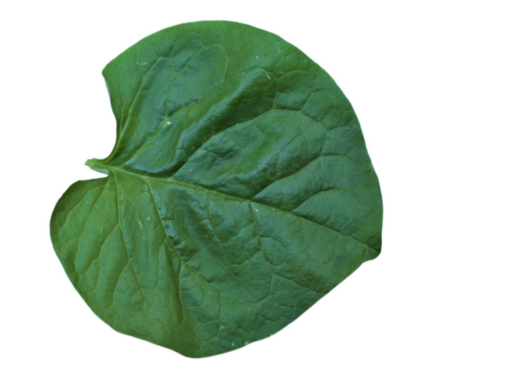

In [10]:
plt.imshow(cv2.cvtColor(image5, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [11]:
leaf_paths = {
    'Alpinia Galanga (Rasna)': list(data_dir.glob('Alpinia Galanga (Rasna)/*')),
    'Amaranthus Viridis (Arive-Dantu)': list(data_dir.glob('Amaranthus Viridis (Arive-Dantu)/*')),
    'Artocarpus Heterophyllus (Jackfruit)': list(data_dir.glob('Artocarpus Heterophyllus (Jackfruit)/*')),
    'Azadirachta Indica (Neem)': list(data_dir.glob('Azadirachta Indica (Neem)/*')),
    'Basella Alba (Basale)': list(data_dir.glob('Basella Alba (Basale)/*')),
    'Brassica Juncea (Indian Mustard)': list(data_dir.glob('Brassica Juncea (Indian Mustard)/*')),
    'Carissa Carandas (Karanda)': list(data_dir.glob('Carissa Carandas (Karanda)/*')),
    'Citrus Limon (Lemon)': list(data_dir.glob('Citrus Limon (Lemon)/*')),
    'Ficus Auriculata (Roxburgh fig)': list(data_dir.glob('Ficus Auriculata (Roxburgh fig)/*')),
    'Ficus Religiosa (Peepal Tree)': list(data_dir.glob('Ficus Religiosa (Peepal Tree)/*')),
    'Hibiscus Rosa-sinensis': list(data_dir.glob('Hibiscus Rosa-sinensis/*')),
    'Jasminum (Jasmine)': list(data_dir.glob('Jasminum (Jasmine)/*')),
    'Mangifera Indica (Mango)': list(data_dir.glob('Mangifera Indica (Mango)/*')),
    'Mentha (Mint)': list(data_dir.glob('Mentha (Mint)/*')),
    'Moringa Oleifera (Drumstick)': list(data_dir.glob('Moringa Oleifera (Drumstick)/*')),
    'Muntingia Calabura (Jamaica Cherry-Gasagase)': list(data_dir.glob('Muntingia Calabura (Jamaica Cherry-Gasagase)/*')),
    'Murraya Koenigii (Curry)': list(data_dir.glob('Murraya Koenigii (Curry)/*')),
    'Nerium Oleander (Oleander)': list(data_dir.glob('Nerium Oleander (Oleander)/*')),
    'Nyctanthes Arbor-tristis (Parijata)': list(data_dir.glob('Nyctanthes Arbor-tristis (Parijata)/*')),
    'Ocimum Tenuiflorum (Tulsi)': list(data_dir.glob('Ocimum Tenuiflorum (Tulsi)/*')),
    'Piper Betle (Betel)': list(data_dir.glob('Piper Betle (Betel)/*')),
    'Plectranthus Amboinicus (Mexican Mint)': list(data_dir.glob('Plectranthus Amboinicus (Mexican Mint)/*')),
    'Pongamia Pinnata (Indian Beech)': list(data_dir.glob('Pongamia Pinnata (Indian Beech)/*')),
    'Psidium Guajava (Guava)': list(data_dir.glob('Psidium Guajava (Guava)/*')),
    'Punica Granatum (Pomegranate)': list(data_dir.glob('Punica Granatum (Pomegranate)/*')),
    'Santalum Album (Sandalwood)': list(data_dir.glob('Santalum Album (Sandalwood)/*')),
    'Syzygium Cumini (Jamun)': list(data_dir.glob('Syzygium Cumini (Jamun)/*')),
    'Syzygium Jambos (Rose Apple)': list(data_dir.glob('Syzygium Jambos (Rose Apple)/*')),
    'Tabernaemontana Divaricata (Crape Jasmine)': list(data_dir.glob('Tabernaemontana Divaricata (Crape Jasmine)/*')),
    'Trigonella Foenum-graecum (Fenugreek)': list(data_dir.glob('Trigonella Foenum-graecum (Fenugreek)/*'))
}


In [12]:
leaf_labels = {
    'Alpinia Galanga (Rasna)': 0,
    'Amaranthus Viridis (Arive-Dantu)': 1,
    'Artocarpus Heterophyllus (Jackfruit)': 2,
    'Azadirachta Indica (Neem)': 3,
    'Basella Alba (Basale)': 4,
    'Brassica Juncea (Indian Mustard)': 5,
    'Carissa Carandas (Karanda)': 6,
    'Citrus Limon (Lemon)': 7,
    'Ficus Auriculata (Roxburgh fig)': 8,
    'Ficus Religiosa (Peepal Tree)': 9,
    'Hibiscus Rosa-sinensis': 10,
    'Jasminum (Jasmine)': 11,
    'Mangifera Indica (Mango)': 12,
    'Mentha (Mint)': 13,
    'Moringa Oleifera (Drumstick)': 14,
    'Muntingia Calabura (Jamaica Cherry-Gasagase)': 15,
    'Murraya Koenigii (Curry)': 16,
    'Nerium Oleander (Oleander)': 17,
    'Nyctanthes Arbor-tristis (Parijata)': 18,
    'Ocimum Tenuiflorum (Tulsi)': 19,
    'Piper Betle (Betel)': 20,
    'Plectranthus Amboinicus (Mexican Mint)': 21,
    'Pongamia Pinnata (Indian Beech)': 22,
    'Psidium Guajava (Guava)': 23,
    'Punica Granatum (Pomegranate)': 24,
    'Santalum Album (Sandalwood)': 25,
    'Syzygium Cumini (Jamun)': 26,
    'Syzygium Jambos (Rose Apple)': 27,
    'Tabernaemontana Divaricata (Crape Jasmine)': 28,
    'Trigonella Foenum-graecum (Fenugreek)': 29
}


In [13]:
X,y = [],[]

for leaf_name, images in leaf_paths.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img = cv2.resize(img, (128, 128))
        X.append(resized_img)
        y.append(leaf_labels[leaf_name])

In [14]:
def plot_image(n):
    plt.axis('off')
    plt.imshow(cv2.cvtColor(X[n], cv2.COLOR_BGR2RGB))
    print(y[n])

0


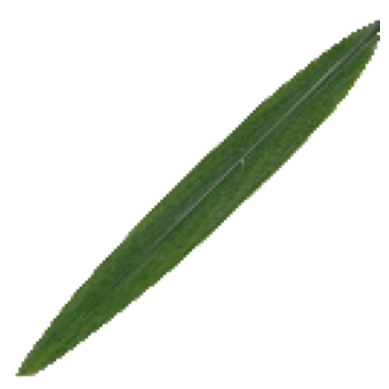

In [15]:
plot_image(5)

In [16]:
X=np.array(X)
y=np.array(y)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train=X_train/255
X_test=X_test/255

print(X_train[0])

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [19]:
data_augment_model = Sequential(
    [
        tf.keras.layers.RandomFlip(mode='vertical'),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomContrast(0.1)
    ])

In [20]:
pretrained_model_without_output_layer = Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-feature-vector/versions/2",trainable=False)
])
pretrained_model_without_output_layer.build([None, 128, 128, 3])  # Batch input shape

Attaching model 'google/mobilenet-v2/tensorflow2/035-128-feature-vector/2' to your Kaggle notebook...


In [36]:
model = Sequential(
    [
        data_augment_model,
        pretrained_model_without_output_layer,
        Dense(30)
    ]
)
model.build([None, 128, 128, 3])

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 dense_1 (Dense)             (None, 30)                38430     
                                                                 
Total params: 448638 (1.71 MB)
Trainable params: 38430 (150.12 KB)
Non-trainable params: 410208 (1.56 MB)
_________________________________________________________________


In [38]:
model.compile(
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer = tf.keras.optimizers.Adam(),
        metrics=['accuracy']
    )
output=model.fit(X_test, y_test,epochs=30, validation_data=[X_test, y_test])

Epoch 1/30
12/12 [==============================] - 6s 315ms/step - loss: 3.3948 - accuracy: 0.1199 - val_loss: 2.5866 - val_accuracy: 0.2725
Epoch 2/30
12/12 [==============================] - 2s 196ms/step - loss: 2.3422 - accuracy: 0.3569 - val_loss: 1.8671 - val_accuracy: 0.5613
Epoch 3/30
12/12 [==============================] - 2s 187ms/step - loss: 1.6758 - accuracy: 0.5886 - val_loss: 1.4304 - val_accuracy: 0.6649
Epoch 4/30
12/12 [==============================] - 2s 185ms/step - loss: 1.2935 - accuracy: 0.6975 - val_loss: 1.1193 - val_accuracy: 0.7466
Epoch 5/30
12/12 [==============================] - 2s 183ms/step - loss: 1.0651 - accuracy: 0.7411 - val_loss: 0.9517 - val_accuracy: 0.8147
Epoch 6/30
12/12 [==============================] - 2s 188ms/step - loss: 0.9164 - accuracy: 0.7984 - val_loss: 0.8126 - val_accuracy: 0.8392
Epoch 7/30
12/12 [==============================] - 2s 181ms/step - loss: 0.7673 - accuracy: 0.8474 - val_loss: 0.7032 - val_accuracy: 0.8719
Epoch 

In [39]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 1s 65ms/step - loss: 0.2207 - accuracy: 0.9673


[0.22065655887126923, 0.9673024415969849]

In [40]:
logits = model.predict(X_test)
activations=tf.nn.softmax(logits)
y_pred = [np.argmax(pred) for pred in activations]

12/12 [==============================] - 1s 63ms/step


In [41]:
print(y_pred[:5])
print(y_test.tolist()[:5])

[9, 4, 14, 7, 29]
[9, 4, 14, 7, 29]


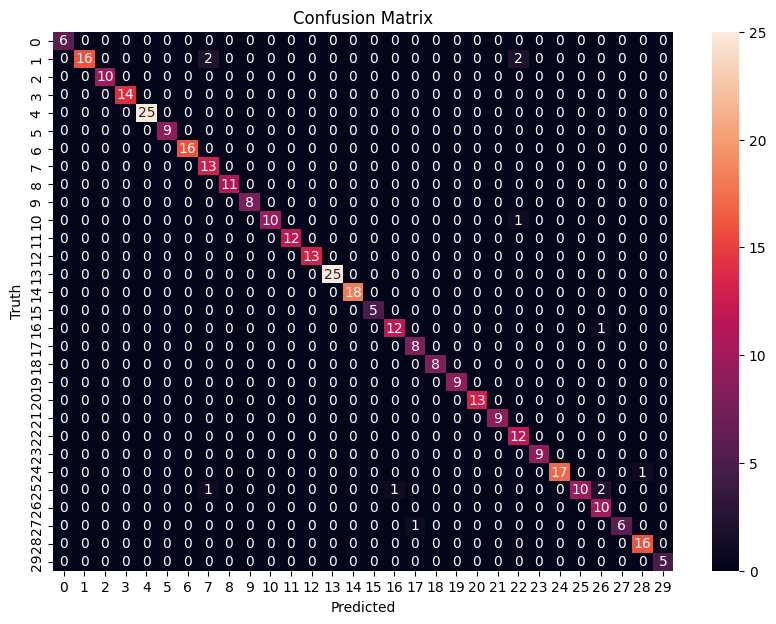

In [42]:
import seaborn as sn

cm=tf.math.confusion_matrix(labels=y_test.tolist(), predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test.tolist(), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.80      0.89        20
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        16
           7       0.81      1.00      0.90        13
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         8
          10       1.00      0.91      0.95        11
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        18
          15       1.00      1.00      1.00         5
          16       0.92      0.92      0.92        13
          17       0.89    

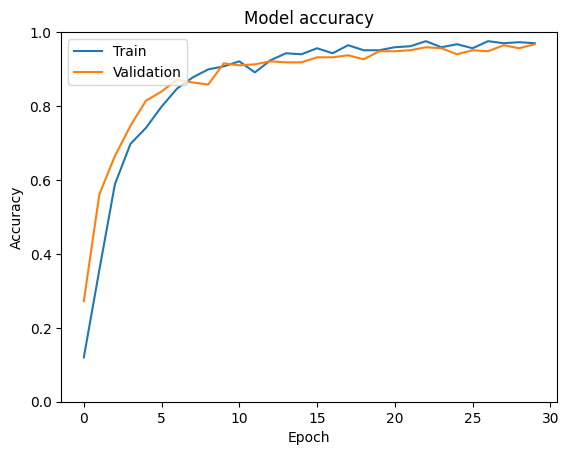

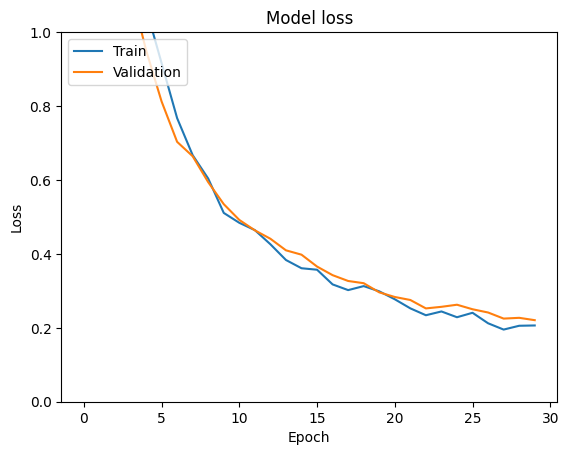

In [44]:
## Results and Evaluation
### Training and Validation Curves
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(output.history['accuracy'])
plt.plot(output.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1]) 
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1]) 
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [5]:
img=cv2.imread('/kaggle/input/neem-test/AI-S-029.jpg')
resized_img = cv2.resize(img, (128, 128))
print(resized_img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


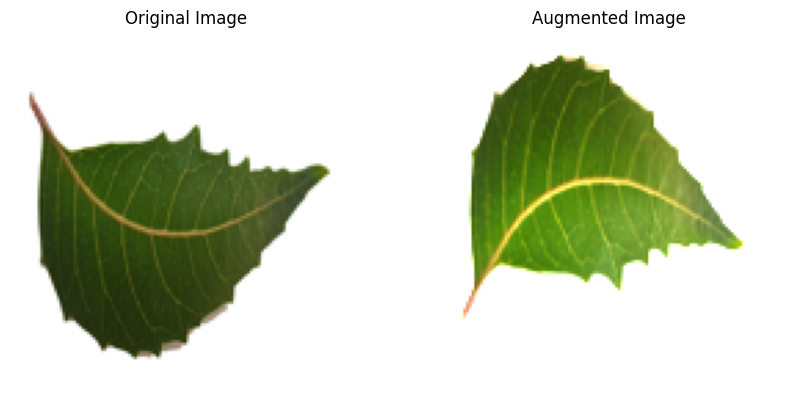

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Example image path
image_path = '/kaggle/input/neem-test/AI-S-029.jpg'

# Load and preprocess the example image
image = Image.open(image_path)
image = image.resize((128,128))  # Resize if needed
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.expand_dims(image_array, 0)

# Create an ImageDataGenerator with the desired augmentations
datagen = ImageDataGenerator(
    vertical_flip=True,
    zoom_range=0.1,
    rotation_range=0.4,
    brightness_range=[1,2]
)

# Generate augmented images
augmented_images = datagen.flow(image_array)

# Plot original and augmented images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot original image
axs[0].imshow(tf.keras.preprocessing.image.array_to_img(image_array[0]))
axs[0].set_title('Original Image')
axs[0].axis('off')

# Plot augmented image
augmented_image = next(augmented_images)
axs[1].imshow(tf.keras.preprocessing.image.array_to_img(augmented_image[0]))
axs[1].set_title('Augmented Image')
axs[1].axis('off')

plt.show()

In [45]:
model.save('/kaggle/working/model')